In [115]:
# Check time stamps
# Inspect data and visualize the time stamps of the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [116]:
# Load the electric production time series data
# Reads the CSV file, parses the "DATE" column as datetime, and sets it as the index
tdf = pd.read_csv('data/Electric_Production.csv', parse_dates=["DATE"], index_col="DATE")

In [117]:
print(tdf.head())

            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


In [118]:
# checking for missing values
# checking for missing values
# This will return the number of missing (NaN) values in each column of the DataFrame `tdf`.
# Useful for identifying incomplete data before further analysis or modeling.
tdf.isnull().sum()

IPG2211A2N    0
dtype: int64

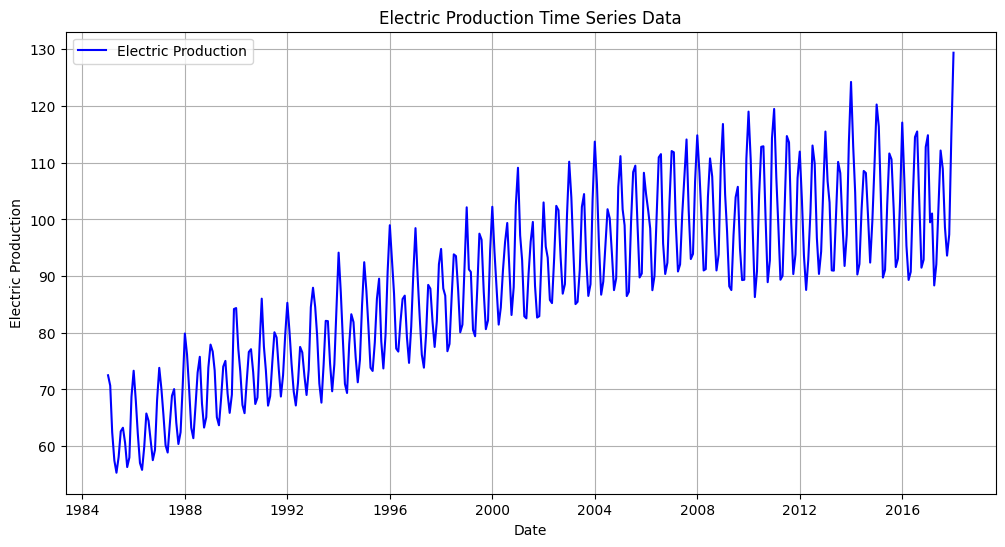

In [119]:
# Plotting the Electric Production Time Series Data (TSD)
# This plot visualizes the 'IPG2211A2N' column from the DataFrame 'tdf' over time.
# - X-axis: Date (from the DataFrame index)
# - Y-axis: Electric Production values
# - The plot helps to inspect trends, seasonality, and anomalies in the time series.

plt.figure(figsize=(12, 6))
plt.plot(tdf.index, tdf["IPG2211A2N"], label="Electric Production", color="blue")
plt.title("Electric Production Time Series Data")
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.grid(True)
plt.legend()
plt.show()

In [120]:
tdf.index.duplicated().sum()  # check for duplicate timestamps

0

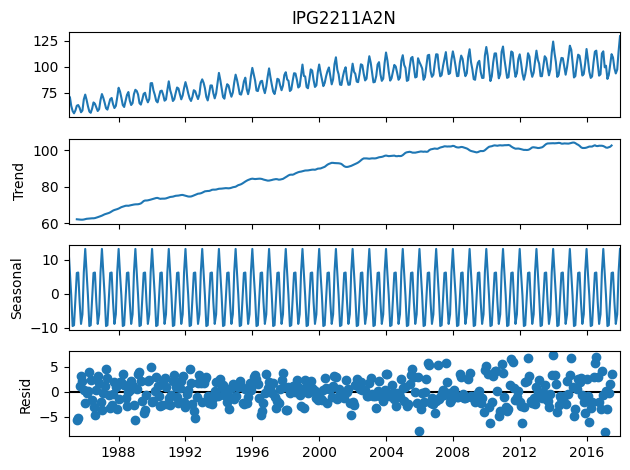

In [121]:
"""
Performs exploratory data analysis (EDA) by decomposing the electric production time series data.

- Uses seasonal_decompose from statsmodels to split the 'IPG2211A2N' column of the DataFrame 'tdf' into trend, seasonal, and residual components.
- Assumes monthly data with a period of 12.
- Plots the decomposition results for visual inspection of trend and seasonality.

Returns:
    None. Displays a decomposition plot.
"""
# EDA
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
result = seasonal_decompose(tdf["IPG2211A2N"], model='additive', period=12)

# Plot decomposition
result.plot()
plt.show() 

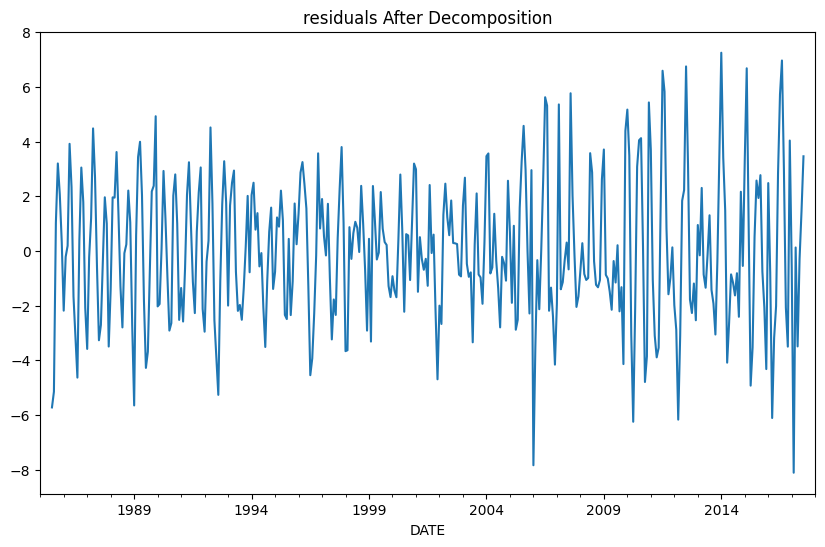

DATE
2006-01-01   -7.835856
2017-02-01   -8.109151
Name: resid, dtype: float64


In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Decompose 
result = seasonal_decompose(tdf["IPG2211A2N"], model='additive', period=12)
residual = result.resid

# Plot residuals
residual.plot(figsize=(10, 6))
plt.title("residuals After Decomposition")
plt.show()


# Detect large residuals
outliers = residual[np.abs(residual) > 3 * residual.std()]
print(outliers)

In [123]:
# checking if the data is stationary
from statsmodels.tsa.stattools import adfuller, kpss

result_adfuller = adfuller(tdf["IPG2211A2N"])
print("ADF Statistic:", result_adfuller[0])
print("p-value:", result_adfuller[1])

"""
Performs the Augmented Dickey-Fuller test to check for stationarity of a time series.

The null hypothesis of the ADF test is that the time series is non-stationary.
A low p-value (typically ≤ 0.05) indicates that the null hypothesis can be rejected,
meaning the time series is likely stationary. Conversely, a p-value > 0.05 suggests
the time series is non-stationary.

Args:
    timeseries (pd.Series): The time series data to be tested.

Returns:
    None. Prints the ADF statistic and p-value.
    Prints a statement indicating whether the time series is stationary based on the p-value.
"""


ADF Statistic: -2.2569903500472366
p-value: 0.18621469116587053


'\nPerforms the Augmented Dickey-Fuller test to check for stationarity of a time series.\n\nThe null hypothesis of the ADF test is that the time series is non-stationary.\nA low p-value (typically ≤ 0.05) indicates that the null hypothesis can be rejected,\nmeaning the time series is likely stationary. Conversely, a p-value > 0.05 suggests\nthe time series is non-stationary.\n\nArgs:\n    timeseries (pd.Series): The time series data to be tested.\n\nReturns:\n    None. Prints the ADF statistic and p-value.\n    Prints a statement indicating whether the time series is stationary based on the p-value.\n'

In [124]:
"""
KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin Test)

The KPSS test is a statistical test used to check the stationarity of a time series. 
It tests whether a time series is stationary around a mean (level stationarity) or around a deterministic trend (trend stationarity).

How it works:
- The test statistic is calculated based on the residuals from the regression of the time series on a constant (or constant and trend).
- The test compares the test statistic to critical values to determine if the null hypothesis can be rejected.

Hypotheses:
- Null Hypothesis (H0): The time series is stationary (level or trend stationary).
- Alternative Hypothesis (H1): The time series is non-stationary (has a unit root).

Significance Value:
- A typical significance level (alpha) is 0.05.
- If the p-value is less than 0.05, reject the null hypothesis and conclude the series is non-stationary.
"""

result_kpss = kpss(tdf["IPG2211A2N"])
print("KPSS Statistic:", result_kpss[0])
print("p-value:", result_kpss[1])

KPSS Statistic: 3.5315970094994853
p-value: 0.01


/var/folders/mj/2jg_g38s4xs2kc17k972gjb80000gn/T/ipykernel_40113/2645139395.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(tdf["IPG2211A2N"])


## Converting the non-stationary data to stationary

In [125]:
tdf.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


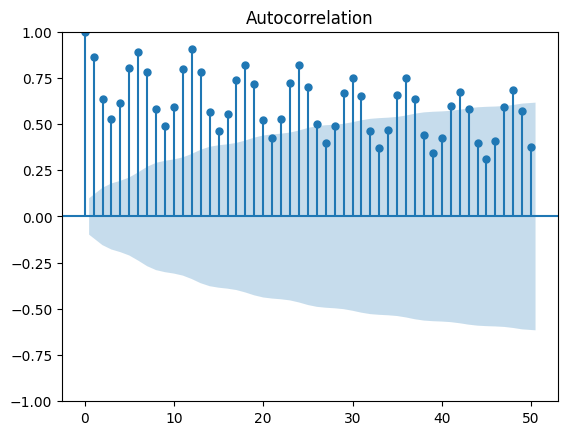

In [126]:
# subtracting the current value from the previous value
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(tdf["IPG2211A2N"], lags=50)
plt.show()

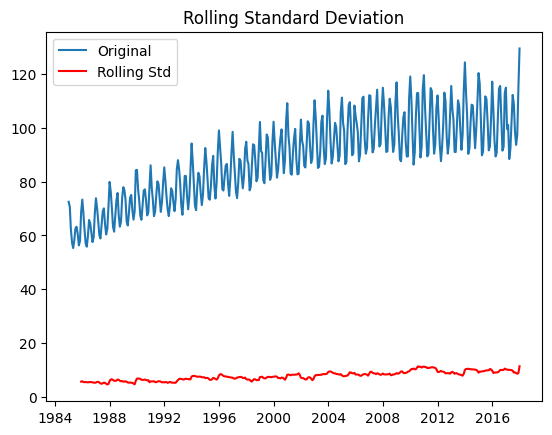

In [127]:
# checking for variance
rolling_std = tdf["IPG2211A2N"].rolling(window=12).std()
plt.plot(tdf["IPG2211A2N"], label='Original')
plt.plot(rolling_std, label='Rolling Std', color='red')
plt.legend()
plt.title("Rolling Standard Deviation")
plt.show()


In [128]:
"""
ARCH Test (Autoregressive Conditional Heteroskedasticity Test)

The ARCH test is a statistical test used to detect the presence of autoregressive conditional heteroskedasticity (ARCH) effects in a time series. 
ARCH effects indicate that the variance of the current error term or innovation is related to the variances of previous time periods' error terms, 
which is common in financial and economic time series.

How it works:
- The test fits a regression model to the squared residuals of a time series.
- It checks whether past squared residuals can explain the current squared residual.
- If the test statistic is significant (low p-value), it suggests the presence of ARCH effects (time-varying volatility).

Use case:
- The ARCH test is commonly used before fitting GARCH or other volatility models to determine if modeling conditional heteroskedasticity is necessary.

Hypotheses:
- Null Hypothesis (H0): No ARCH effects (homoskedasticity; constant variance).
- Alternative Hypothesis (H1): Presence of ARCH effects (heteroskedasticity; time-varying variance).

Interpretation:
- A p-value less than the chosen significance level (e.g., 0.05) indicates rejection of the null hypothesis, suggesting the presence of ARCH effects.
"""


# ARCH test
from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(tdf["IPG2211A2N"].dropna())
print("P-value: ", arch_test[1])

P-value:  2.423304983052259e-71


In [129]:
tdf_complement = tdf.copy()

In [130]:
tdf_complement["IPG2211A2N"] = np.log(tdf_complement["IPG2211A2N"])

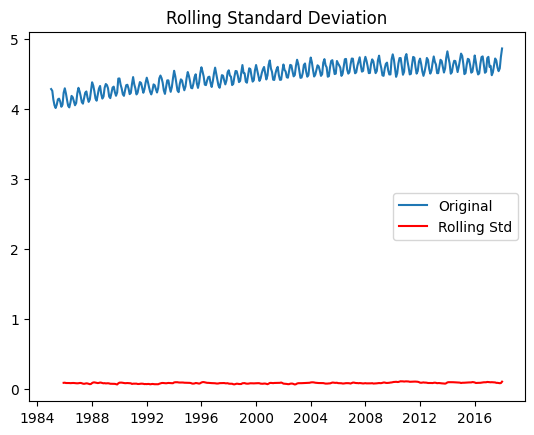

In [131]:
rolling_std = tdf_complement["IPG2211A2N"].rolling(window=12).std()
plt.plot(tdf_complement["IPG2211A2N"], label='Original')
plt.plot(rolling_std, label='Rolling Std', color='red')
plt.legend()
plt.title("Rolling Standard Deviation")
plt.show()

In [132]:
arch_test = het_arch(tdf_complement["IPG2211A2N"].dropna())
print("P-value: ", arch_test[1])

P-value:  5.1696768412510406e-73


In [133]:
tdf_complement["IPG2211A2N"] = np.log(tdf_complement["IPG2211A2N"])

In [134]:
from scipy import stats
tdf_complement["boxcox"], fitted_lambda = stats.boxcox(tdf_complement["IPG2211A2N"])

In [135]:
arch_test = het_arch(tdf_complement["IPG2211A2N"].dropna())
print("P-value: ", arch_test[1])

P-value:  3.4929854531465954e-73


In [136]:
tdf_complement.head()

,IPG2211A2N,boxcox
DATE,,
1985-01-01,1.454807,3.405966
1985-02-01,1.448811,3.273555
1985-03-01,1.419335,2.685182
1985-04-01,1.399035,2.334974
1985-05-01,1.389551,2.185230


In [137]:
from arch import arch_model

# Drop NaNs from transformation if needed
series = tdf_complement["IPG2211A2N"].dropna()


# Fit GARCH(1,1)
model = arch_model(series, vol='Garch', p=1, q=1)
res = model.fit(disp="off")
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             IPG2211A2N   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                782.817
Distribution:                  Normal   AIC:                          -1557.63
Method:            Maximum Likelihood   BIC:                          -1541.70
                                        No. Observations:                  397
Date:                Thu, May 15 2025   Df Residuals:                      396
Time:                        11:20:22   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.5150  2.663e-03    568.955      0.000 [  1.510,  1.52

/Users/sahreenhaider/Documents/TSD/.venv/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00164. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [138]:
def test_stationarity(timeseries):
    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(timeseries)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    if adf_result[1] <= 0.05:
        print("The time series is stationary")
    else:
        print("The time series is not stationary")

test_stationarity(tdf_complement["IPG2211A2N"].dropna())

ADF Statistic: -3.3587834090645456
p-value: 0.012446803009403843
The time series is stationary


In [139]:
# removing the trend ---> using the difference method
tdf_complement['diff'] = tdf_complement['IPG2211A2N'].diff()
test_stationarity(tdf_complement['diff'].dropna())

ADF Statistic: -6.636249778596157
p-value: 5.553228477440035e-09
The time series is stationary


In [140]:
tdf_complement.head()

,IPG2211A2N,boxcox,diff
DATE,,,
1985-01-01,1.454807,3.405966,NaN
1985-02-01,1.448811,3.273555,-0.005996
1985-03-01,1.419335,2.685182,-0.029476
1985-04-01,1.399035,2.334974,-0.020300
1985-05-01,1.389551,2.185230,-0.009484


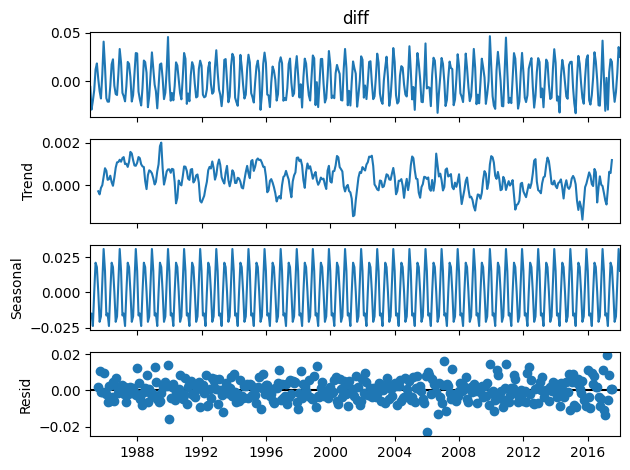

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series data
result = seasonal_decompose(tdf_complement["diff"].dropna(), model='additive', period=12)
# Plot decomposition
result.plot()
plt.show()

In [142]:
tdf_complement.isnull().sum()

IPG2211A2N    0
boxcox        0
diff          1
dtype: int64

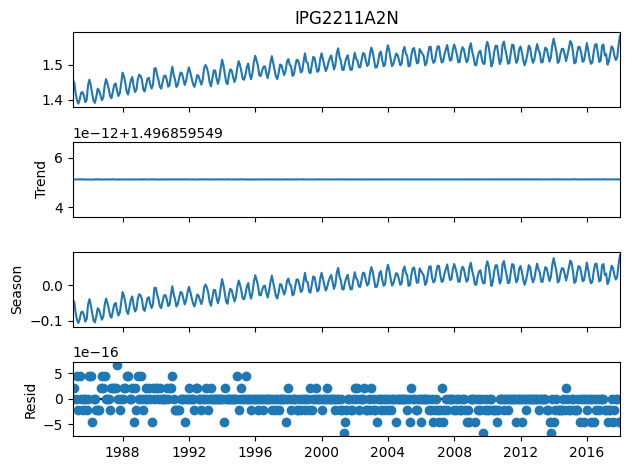

In [143]:
from statsmodels.tsa.seasonal import STL

stl = STL(tdf_complement["IPG2211A2N"].dropna(), period=397)
result = stl.fit()

result.plot()
plt.show()

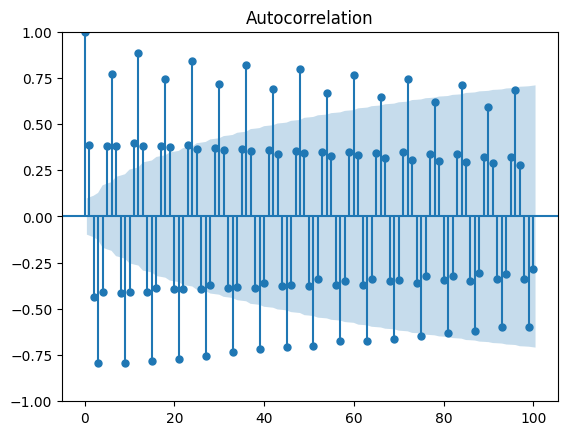

In [144]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(tdf_complement["diff"].dropna(), lags=100)
plt.show()

In [145]:
tdf_complement.isnull().sum()

IPG2211A2N    0
boxcox        0
diff          1
dtype: int64

In [146]:
tdf_complement.head()

,IPG2211A2N,boxcox,diff
DATE,,,
1985-01-01,1.454807,3.405966,NaN
1985-02-01,1.448811,3.273555,-0.005996
1985-03-01,1.419335,2.685182,-0.029476
1985-04-01,1.399035,2.334974,-0.020300
1985-05-01,1.389551,2.185230,-0.009484


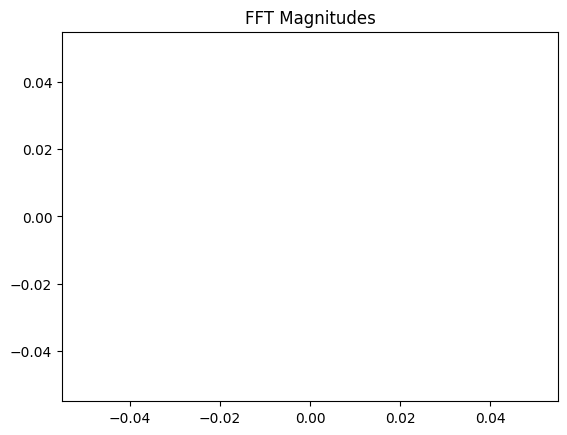

In [147]:
fft_vals = np.fft.fft(tdf_complement["diff"] - tdf_complement["diff"].mean())
plt.plot(np.abs(fft_vals))
plt.title("FFT Magnitudes")
plt.show()

In [148]:
# using fourier transofmers to  check seasonality

signal = tdf_complement["diff"].dropna().values
signal_centered = signal - np.mean(signal)

# step 2: Apply FFT
fft_vals = np.fft.fft(signal_centered)
fft_freq =  np.fft.fftfreq(len(signal_centered))

# step 3: Take only the positive frequencies
positive_freqs = fft_freq[:len(fft_freq) // 2]
magnitude = np.abs(fft_vals)[:len(fft_vals) // 2]

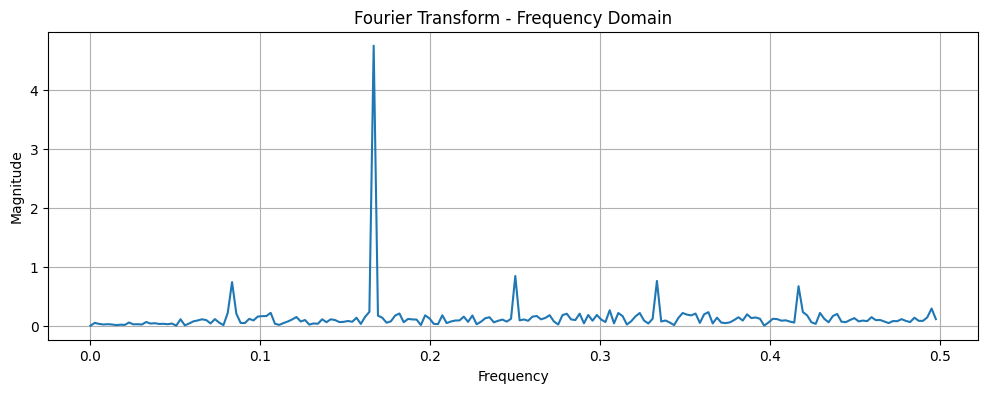

In [149]:
# Step 4: Plot
plt.figure(figsize=(12, 4))
plt.plot(positive_freqs, magnitude)
plt.title("Fourier Transform - Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()